# Building a Recurrent Neural Network (RNN)

Use RNN to do text classification on IMDB movie review dataset



## Library Imports

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

## Load the dataset

In [2]:
# we will define a vocab_size limit and will load the data based on that vocab_size
vocab_size = 20000

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

In [4]:
# Padding all sequences, so that the reviews are of the same length
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=200) # We will take reviews till 200 words
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=200)

## Building the Recurrent Neural Network

In [5]:
# Some constants for the RNN
LSTM_UNITS = 128
OUTPUT_UNITS = 1
LSTM_ACTIVATION = tf.keras.activations.tanh
OUTPUT_ACTIVATION = tf.keras.activations.sigmoid

#OPTIMIZER = tf.keras.optimizers.RMSprop()
OPTIMIZER = tf.keras.optimizers.Adam()
LOSS = tf.keras.losses.binary_crossentropy
METRICS = ['accuracy']

NUM_EPOCHS = 5
BATCH_SIZE = 128

In [6]:
model = tf.keras.Sequential()
# Embedding layer allows the rnn to get trained from a word vector representation
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=LSTM_UNITS, input_shape=(X_train.shape[1],)))
# Adding the LSTM layer
model.add(tf.keras.layers.LSTM(units=LSTM_UNITS, activation=LSTM_ACTIVATION))
# Adding the Dense Output layer
model.add(tf.keras.layers.Dense(units=OUTPUT_UNITS, activation=OUTPUT_ACTIVATION))

# Compiling the model
model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=METRICS)

# Check the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


2022-07-30 19:37:16.372751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 19:37:16.376775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 19:37:16.376940: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-30 19:37:16.377489: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Training the Model

In [7]:
epochs_fit = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5


2022-07-30 19:37:18.754001: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


196/196 [==============================] - 4s 12ms/step - loss: 0.4061 - accuracy: 0.8122
Epoch 2/5
196/196 [==============================] - 2s 12ms/step - loss: 0.2001 - accuracy: 0.9250
Epoch 3/5
196/196 [==============================] - 3s 13ms/step - loss: 0.1294 - accuracy: 0.9546
Epoch 4/5
196/196 [==============================] - 2s 12ms/step - loss: 0.0903 - accuracy: 0.9692
Epoch 5/5
196/196 [==============================] - 2s 12ms/step - loss: 0.0717 - accuracy: 0.9756


Text(0.5, 1.0, 'Training Accuracy Progress')

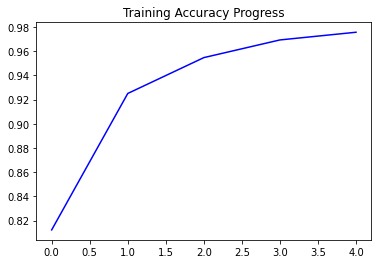

In [8]:
# Plot the training accuracy
epochs = range(len(epochs_fit.history['accuracy']))
plt.plot(epochs, epochs_fit.history['accuracy'], 'b', label='Training Accuracy')
plt.title("Training Accuracy Progress")

Text(0.5, 1.0, 'Training Loss Decline')

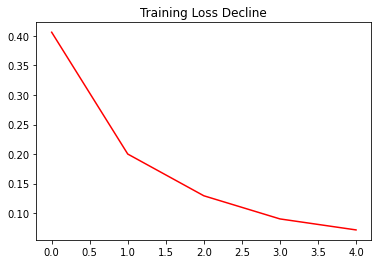

In [9]:
# Plot the training loss
epochs = range(len(epochs_fit.history['loss']))
plt.plot(epochs, epochs_fit.history['loss'], 'r', label='Training Loss')
plt.title('Training Loss Decline')

## Evaluating the Model

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy - {test_accuracy}")
print(f"Test Loss - {test_loss}")

782/782 [==============================] - 4s 5ms/step - loss: 0.4575 - accuracy: 0.8546
Test Accuracy - 0.8546000123023987
Test Loss - 0.457541823387146


In [11]:
# Do the predictions as per the model on the test data
predictions = (model.predict(X_test) > 0.5).astype('int32')
print("Classification Report")
print(classification_report(predictions, y_test))
print("\n")
print("Confusion Matrix")
print(confusion_matrix(predictions, y_test))

782/782 [==============================] - 3s 4ms/step
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     11691
           1       0.89      0.83      0.86     13309

    accuracy                           0.85     25000
   macro avg       0.85      0.86      0.85     25000
weighted avg       0.86      0.85      0.85     25000



Confusion Matrix
[[10278  1413]
 [ 2222 11087]]
